In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
boston_data=load_boston()

In [5]:
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
from sklearn.tree import DecisionTreeRegressor


In [0]:
X=df['LSTAT'].values.reshape(-1,1)
y=boston_data.target
tree=DecisionTreeRegressor(max_depth=2)
tree.fit(X,y)
sort_index=X.flatten().argsort()
y_pred=tree.predict(X[sort_index])

Text(0, 0.5, 'MEDV')

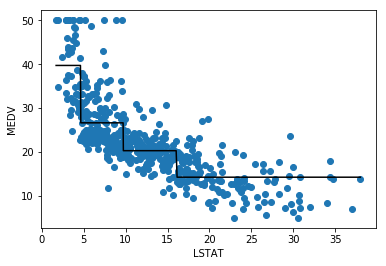

In [9]:
plt.scatter(X[sort_index],y[sort_index])
plt.plot(X[sort_index],y_pred,color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [0]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
forest=DecisionTreeRegressor(criterion='mse',random_state=42)
forest.fit(X_train,y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

In [13]:
print('MSE train : {0:,.4f}, \nMSE test:{1:,.4f}'.format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train : 3.6111, 
MSE test:36.3871


In [15]:
print('R2 train : {0:,.4f}, \nR2 test:{1:,.4f}'.format(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R2 train : 0.9584, 
R2 test:0.5038
